<a href="https://colab.research.google.com/github/nick-nick-nick/Learners-Space-ML/blob/main/ImagePreprocessing_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**RUN ALL THE CELLS AND DON'T EDIT ANY CELL**

**CODE IN THE MENTIONED CELLS ONLY**

## Import Necessary Files

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import zipfile
import os

# Specify the path to the uploaded zip file
zip_filename = "/content/images.zip"  # Replace with the actual file name

# Create a directory to extract to
extract_to = os.path.splitext(zip_filename)[0]
os.makedirs(extract_to, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Extracted to {extract_to}")


Extracted to /content/images


Add ```/path/to/your/folder``` to load the images

In [49]:
cartoon = cv2.imread("/content/images/cartoon.bmp")
cartoon_y = cv2.imread("/content/images/cartoon_y.jpg")
girl = cv2.imread("/content/images/girl.png") #grayscale image
girl_y = cv2.imread("/content/images/girl_y.jpg")
fingerprint = cv2.imread("/content/images/fingerprint.jpg")
fingerprint_y = cv2.imread("/content/images/fingerprint_y.jpg")

## Raw and Final Image
You need to process the raw images: ```cartoon, girl, fingerprint``` to get the processed images: ```cartoon_y, girl_y, fingerprint_y```

Your processed image need not be 100% alike given processed image. They are given to give you an idea of what to process in the raw images.

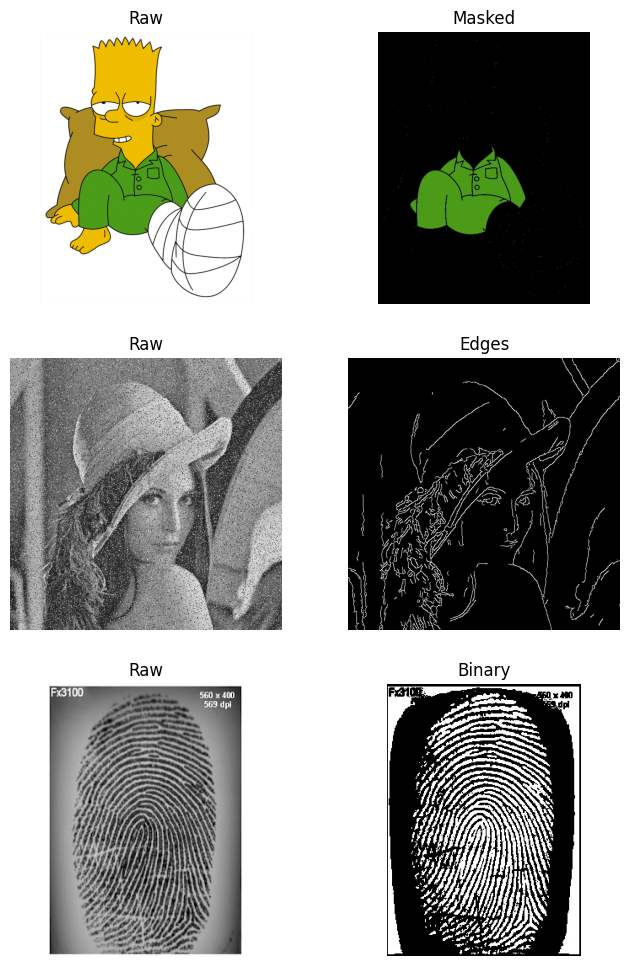

In [50]:
fig, axs = plt.subplots(3,2,figsize=(8,12))
axs[0,0].imshow(cv2.cvtColor(cartoon,cv2.COLOR_BGR2RGB))
axs[0,1].imshow(cartoon_y)
axs[0,0].axis("off")
axs[0,1].axis("off")
axs[0,0].set_title("Raw")
axs[0,1].set_title("Masked")
axs[1,0].imshow(girl)
axs[1,1].imshow(girl_y)
axs[1,0].axis("off")
axs[1,1].axis("off")
axs[1,0].set_title("Raw")
axs[1,1].set_title("Edges")
axs[2,0].imshow(cv2.cvtColor(fingerprint,cv2.COLOR_BGR2RGB))
axs[2,1].imshow(fingerprint_y)
axs[2,0].axis("off")
axs[2,1].axis("off")
axs[2,0].set_title("Raw")
axs[2,1].set_title("Binary")
plt.show()

## Code in the following 3 cells only

### Cartoon
For the bart image, you need to mask the dress. Write all your code in the cell below and the final image should be stored in ```cartoon_y_mentee``` variable only or it'll show error later.

In [55]:
#START CODE HERE (Do all your processing here)
image = cv2.imread('/content/images/cartoon.bmp')  # Replace with your image file
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

# Define the range for green color in HSV
lower_green = np.array([40, 40, 40])  # Adjust these values for your image
upper_green = np.array([80, 255, 255])  # Adjust these values for your image

# Convert the image to HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# Create a mask for the green color
mask = cv2.inRange(hsv_image, lower_green, upper_green)

# Apply the mask to get the green object
masked_image = cv2.bitwise_and(image, image, mask=mask)
cartoon_y_mentee = masked_image #(in RGB format only)


#END CODE HERE (the final processed image should be cartoon_y_mentee)

### Girl
For the girl image, you need to detect the edges. Write all your code in the cell below and the final image should be stored in ```girl_y_mentee``` variable only or it'll show error later.

In [53]:
#START CODE HERE (Do all your processing here)
# Apply Gaussian blur
gray_image = cv2.imread('/content/images/girl.png', cv2.IMREAD_GRAYSCALE)  # Replace with your image file

# Apply Median blur
blurred_image = cv2.medianBlur(gray_image, 5)  # You can adjust the kernel size

# Perform Canny edge detection
edges = cv2.Canny(blurred_image, threshold1=100, threshold2=150)
girl_y_mentee = edges

#END CODE HERE (the final processed image should be girl_y_mentee)

### Fingerprint
For the fingerprint image, you need to convert it to binary image. Binary images have 2 intensities only (0 or 255). Write all your code in the cell below and the final image should be stored in ```cartoon_y_mentee``` variable only or it'll show error later.

In [76]:
#START CODE HERE (Do all your processing here)
# Load the grayscale image
gray_image2 = cv2.imread('/content/images/fingerprint.jpg', cv2.IMREAD_GRAYSCALE)  # Replace with your image file

# Apply binary thresholding
threshold_value = 110  # You can adjust this value
_, binary_image = cv2.threshold(gray_image2, threshold_value, 255, cv2.THRESH_BINARY)
# Invert the binary image
inverted_binary_image = cv2.bitwise_not(binary_image)
fingerprint_y_mentee = inverted_binary_image #(in Binary format only i.e. pixel intensity = 0 or 255)

#END CODE HERE (the final processed image should be fingerprint_y_mentee)

## Comparison

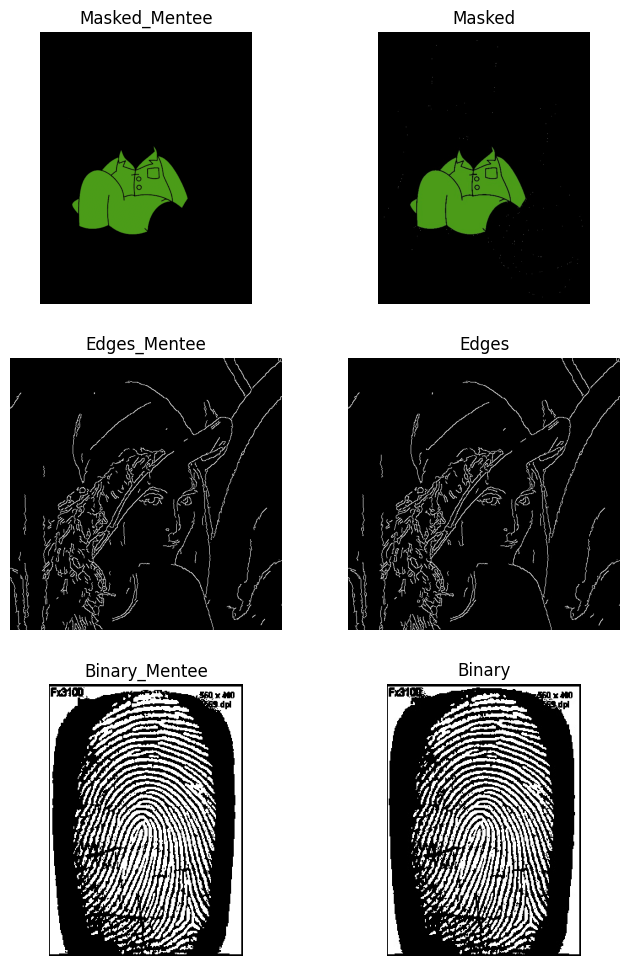

In [77]:
fig, axs1 = plt.subplots(3,2,figsize=(8,12))
axs1[0,0].imshow(cartoon_y_mentee)
axs1[0,1].imshow(cartoon_y)
axs1[0,0].axis("off")
axs1[0,1].axis("off")
axs1[0,0].set_title("Masked_Mentee")
axs1[0,1].set_title("Masked")
axs1[1,0].imshow(girl_y_mentee,cmap="gray")
axs1[1,1].imshow(girl_y)
axs1[1,0].axis("off")
axs1[1,1].axis("off")
axs1[1,0].set_title("Edges_Mentee")
axs1[1,1].set_title("Edges")
axs1[2,0].imshow(fingerprint_y_mentee,cmap="gray")
axs1[2,1].imshow(fingerprint_y)
axs1[2,0].axis("off")
axs1[2,1].axis("off")
axs1[2,0].set_title("Binary_Mentee")
axs1[2,1].set_title("Binary")
plt.show()